# MLG: Lab 4

Throughout the laboratories, questions that you should try to answer are highlighted as follow :

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: This is a question</p>

The file to open is [Lab4_Entropy_DecisionTree.ipynb](./Lab4_Entropy_DecisionTree.ipynb)

# Report

We ask you a basic report answering the following constraints:
- You should answer all purple questions. Note that if you include your development, we can award you points for it. If you just put your answer (and if it is wrong), we will not be able to give you any points.
- You should introduce and conclude each question with whatever you understand about it
- Report is limited to 5 pages

## Entropy formula

$$H_b(X)= -\mathbb E [\log_b {P(X=x_i)}] = \sum_{i=1}^nP_i\log_b \left(\frac{1}{P_i}\right)=-\sum_{i=1}^nP_i\log_b P_i\,\!$$

## Theoretical Example

For this example, let us look at the Wikipedia example:

https://fr.wikipedia.org/wiki/Entropie_de_Shannon#Tirage_al.C3.A9atoire_dans_une_urne

Let us consider an bowl containing a red, a blue, a yellow and a green ball. We choose a random ball. No color being preferred (each having one chance over four of being chosen), the entropy is at its maximum, here equal to:

$$H(x) = -\sum_{i=1}^nP_i\log_b P_i = -\sum_{i=1}^41/4\log_2(1/4) = - 4*1/4\log_2(1/4) = -\log_2(1/4) = \log_2(4) = 2$$

If we agree that the colors are coded respectively: 00, 01, 10, 11, the information contained in the choice is indeed corresponding to 2 bits.

In the case where a color is more represented than others, then the entropy is slightly reduced. Let us suppose for example that the bowl contains 4 red balls, 2 blue balls, 1 yellow and 1 green. The entropy is therefore equal to

$$H(x)=7/4$$

Indeed,

$$\begin{align}H(x)
&= - \frac{4}{8}\log_2\left(\frac{4}{8}\right) - \frac{2}{8} \log_2\left(\frac{2}{8}\right) - \frac{1}{8} \log_2\left(\frac{1}{8}\right) - \frac{1}{8} \log_2\left(\frac{1}{8}\right) \\
&= - \frac{\log_2(1/2)}{2} - \frac{\log_2(1/4)}{4} - \frac{\log_2(1/8)}{8} - \frac{\log_2(1/8)}{8} \\
&= \frac{\log_2(2)}{2} + \frac{\log_2(4)}{4} + \frac{\log_2(8)}{8} + \frac{\log_2(8)}{8} \\
&= 1/2 + 2/4 + 3/8 + 3/8 = 7/4
\end{align}.$$

Easier than expected, no ? Let us see how entropy is used for building decision trees.

## Practical Example: Use entropy to build a Decision Tree Classifier

A decision tree is a recursive partitioning methodology that uses entropy to compute the best split at each node. A split is an action that separates the data in two parts. Intuitively, we could say that the tree will repeat this procedure:
1. Compute the entropy of the observations at the current node
2. For all possible splits:
    1. Compute the entropy at the left-child node
    2. Compute the entropy at the right-child node
    3. Sum them. This gives the split's entropy
3. Choose the split with the minimum entropy

To see this in action, let us build a basic decision tree step by step:

First, let's imagine that we have some points belonging to 3 classes in a 2d space. For example, let's say they are defined like this:

		Var1	Var2	Class
Point 0:	0	1	0
Point 1:	0	0	0
Point 2:	1	1	1
Point 3:	1	0	2


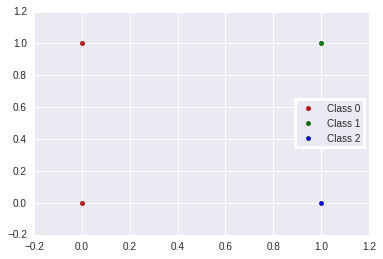

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

colors = {0: 'r', 1: 'g', 2: 'b'}

points = np.array(([0,1,0],
                   [0,0,0],
                   [1,1,1],
                   [1,0,2]))
print '\t\tVar1\tVar2\tClass'
for i, point in enumerate(points):
    print 'Point '+str(i)+':\t'+str(point[0])+'\t'+str(point[1])+'\t'+str(point[2])

for class_no in np.unique(points[:,2]):
    filtered_points = points[points[:, 2]==class_no, :]
    pl.scatter(filtered_points[:, 0], filtered_points[:, 1], label='Class '+str(class_no), c=colors[class_no])
legend = pl.legend(loc=5, frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('white')
frame.set_linewidth(3)

We can compute the entropy, which is now:

$$-(1/2*log_2(1/2)+1/4*log_2(1/4)+1/4*log_2(1/4)))=1.5$$

Now, we have two available variables to split on.
Let's try both splits:

**Split on Var1:** $$Var1==0.5$$
If we cut at 0.5 (meaning all observations with Var1 <= 0.5 will go to left-child node, while all observations with Var1 > 0.5 will go to right-child node), we find ourselves with Points 0 and 1 at the left node, and Points 2 and 3 in the right node.

We can therefore compute the entropy at the left node:
$$-(1*log_2(1))=0$$

Obviously, no more entropy exists at this point, since all observations are of class 0.

And at the right node:
$$-(1/2*log_2(1/2)+1/2*log_2(1/2))=-(log_2(1/2))=1$$

Therefore, the entropy gain by splitting on Var1 was:
$$1.5 - ((0 + 1)/2) = 1.5 - 0.5 = 1$$

**Split on Var2:** $$Var2==0.5$$
If we cut at 0.5, we find ourselves with Points 1 and 3 at the left node, and Points 0 and 2 in the right node.

We can therefore compute the entropy at the left node:
$$-(1/2*log_2(1/2)+1/2*log_2(1/2))=1$$

And at the right node:
$$-(1/2*log_2(1/2)+1/2*log_2(1/2))=1$$

Therefore, the entropy gain by splitting on Var2 was:
$$1.5 - ((1 + 1)/2) = 1.5 - 1 = 0.5$$

So the best split (i.e. the one with the higher entropy gain) is the split on Var1!

A decision tree stops when each leaf (terminal node) contains only 1 class. In this case, the left node contains only samples from class 0, so no further split is necessary. On the contrary, the right node contains a sample from class 1 and a sample from class 2.

So we need one more split on the right node... Again, we can split on Var1 and Var2. But the split on Var1 is trivial, since we can't find a value of Var1 that separates the samples. So the entropy gain will be 0 if we split on Var1.

If we split on Var2 (==0.5), we have Point 3 at the left node, and Point 2 in the right node. Therefore, the entropy at the left node is 0 ($$-1*log_2(1)$$) and the entropy at the right node is also 0 (same calculus). The entropy gain is 1 (1 - ((0+0)/2)).

Therefore the split on Var2 is the best one in the right node.

We find ourselves with a tree looking like this (going to the left means satisfying the condition):

                 Entropy: 1.5
              Points: [0, 1, 2, 3]
             Classes: [0, 0, 1, 2]
                     |
                     |
                     |
                 Var1<=0.5
                /         \
               /           \
              /             \
         Entropy: 0        Entropy: 1
       Points: [0, 1]    Points: [2, 3]
       Classes: [0, 0]   Classes: [1, 2]
                                |
                                |
                                |
                            Var2<=0.5
                           /         \
                          /           \
                         /             \
                    Entropy: 0      Entropy: 0
                    Points: [3]     Points: [2]
                    Classes: [2]    Classes: [1]


This is the reason why we consider decision trees a "white-box" model. It is easy to understand and to visualize.

***
***

We can now try with an automated Decision Tree Classifier building...

Let's do it in the following cell:

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier(criterion='entropy')

tree = tree.fit(points[:,:-1], points[:,-1])

In the previous cell, we asked the tree to fit the Class variable of our points (points[:,-1]) using both Var1 and Var2 values as splitting possibilities (points[:,:-1]).

The tree is now complete, and we can have a look at it by exporting it to the ".dot" format.

In [4]:
export_graphviz(tree, out_file='test.dot')

Now go on http://www.webgraphviz.com/ and copy-paste the content of the "test.dot" file in the box.

You can look at the tree and compare it to the one we built by hand.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What does the "value" parameter indicates in the resulting tree of WebGraphViz ?</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What about the "X[0]" and "X[1]" parameters ?</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: How much leaves does our tree have ? Which one are they ?</p>

## Exercise 1: Optimize a game of Guess Who

![Guess Who](./guess-who.jpg)

Let us try to determine the best questions to ask in order to win guess who in the least number of moves!

Note that in the general case, building a tree is what you are naturally doing when playing guess who!

In this case, we are going to make the tree building process step by step!

In [5]:
import pandas as pd

df = pd.DataFrame({
        'Names': ['Dumbledore', 'Woody Allen', 'Beyoncé', 'Ryan Gosling',
                  'Daenerys Targaryen', 'Lara Croft', 'Karl Marx', 'San Goku'
                 ],
        'Real': ['No', 'Yes', 'Yes', 'Yes',
                 'No', 'No', 'Yes', 'No'
                ],
        'Sex': ['Male', 'Male', 'Female', 'Male',
                'Female', 'Female', 'Male', 'Male'
               ],
        'Beard': ['Yes', 'No', 'No', 'Yes',
                  'No', 'No', 'Yes', 'No'
                 ],
        'Hair': ['Brown', 'Brown', 'Brown', 'Blond',
                 'Blond', 'Brown', 'Brown', 'Brown'
                ]
    }, columns=['Beard', 'Hair', 'Real', 'Sex', 'Names'])

df.Names = pd.Categorical(df.Names)
df.Real = pd.Categorical(df.Real)
df.Sex = pd.Categorical(df.Sex)
df.Beard = pd.Categorical(df.Beard)
df.Hair = pd.Categorical(df.Hair)

df

,Beard,Hair,Real,Sex,Names
0,Yes,Brown,No,Male,Dumbledore
1,No,Brown,Yes,Male,Woody Allen
2,No,Brown,Yes,Female,Beyoncé
3,Yes,Blond,Yes,Male,Ryan Gosling
4,No,Blond,No,Female,Daenerys Targaryen
5,No,Brown,No,Female,Lara Croft
6,Yes,Brown,Yes,Male,Karl Marx
7,No,Brown,No,Male,San Goku


Note that in that case, the "classes" are the names!

Also note that even if it doesn't seem so, the variables (Hair, Beard, Sex, Real) are all 0-1 (binary) variables, like in our previous example. Therefore, you can split at 0.5 as well. (You can decide which value is 1 and which value is 0)

Therefore, let's go and build the tree ourselves...

***

First, let's determine the entropy at the root node:

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What is the value of the entropy at the root node ?</p>

Then, let's try to split on the four variables.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What is the value of the entropy in the both child nodes (left and right) if you decide to split on the "Beard" variable ?</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Same question for the "Hair" variable ?</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Same question for the "Sex" variable ?</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Same question for the "Real" variable ?</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Therefore, what is the best variable to split on ? Why ?</p>

Now that we have our first split, we can do the same for all subsequent splits.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Finish building the tree, and for each split variable, give the entropy in both child nodes as well as the resulting entropy gain. You can do it by hand or by code!</p>


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Are there more than one optimal solution ? Explain why...</p>

Now, let's do it the automated way:

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# We select all columns, but the "Names" one. This creates input_df
input_df = df.select(lambda col: col != 'Names', axis=1)
for col in input_df.columns:
    input_df[col] = input_df[col].cat.codes

# The "Names" column is used in the output_df
output_df = df.Names.cat.codes

# We train our decision tree classifier with our input_df onto our output_df
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model = tree_model.fit(input_df.as_matrix(), output_df.as_matrix())

# And again, we can export it to a dot file and examine it 
export_graphviz(tree_model, out_file='guess_who.dot')

Have a look at the generated tree in http://www.webgraphviz.com/ !

Does it look like the one you computed by hand ? If not, try to understand where you did something wrong.

For more information, you can look at the documentation on scikit-learn.org

For example here is an example on the well-known iris dataset: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: How many classes are there in that example ?</p>

You can see that the separations are mostly straight lines (we see for example in the top-right figure that the blue class seems to be well separated by a line when "petal width (cm) <= -0.5"). By the way, in that example the values are standardized (the mean of each value is reduced to 0 and the standard deviation is set to 1). It is useful for many models, but not for Decision Trees.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What are the possible splits on a real variable (i.e. not 0-1 (binary)), such as the variables in the iris dataset ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Considering the previous question... are there any splits that are equivalent ? Why/Why not ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Go and dig into scikit-learn documentation... What's the other splitting criterion for decision tree classifier (other than the entropy) ?</p>

## Note

You now finished the questions for this laboratory. (nicely done!)
Your note will only be based on what is before this!

Everything that follows is for fun/learning. We will:
- apply decision trees on real data
- see how the Random Forest algorithm works

Oh and by the way: from now on, no more complicated calculus!
Only code execution and general comprehension...

So keep calm, keep focused... and read on at your own pace, it will be useful ;)

## Titanic

The following problem is about the Titanic. The purpose of this project is to try and predict who survived and who died during the wreckship of the Titanic.

To help us with this, we have a training set that is available, with some features such as:
- **survival**        Survival (0 = No; 1 = Yes)
- **pclass**          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name**            Name
- **sex**             Sex
- **age**             Age
- **sibsp**           Number of Siblings/Spouses Aboard
- **parch**           Number of Parents/Children Aboard
- **ticket**          Ticket Number
- **fare**            Passenger Fare
- **cabin**           Cabin
- **embarked**        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Let's load the dataset and try to understand it.

In [7]:
# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)

# Let's look at the first 3 rows
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
print df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [11]:
# We see that the Age column has some missing values
# We won't be able to use these values later on...
# We can either drop them or fill them (by the median)
df['AgeFill'] = df.Age

df.loc[df.Age.isnull(), 'AgeFill'] = df.Age.median()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeFill        891 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 97.5+ KB


In [12]:
# Let's drop some columns that we won't use
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1)
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeFill
0,0,3,male,1,0,7.2500,22
1,1,1,female,1,0,71.2833,38
2,1,3,female,0,0,7.9250,26


In [13]:
# Let us convert the Sex column from string to int
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeFill
0,0,3,1,1,0,7.2500,22
1,1,1,0,1,0,71.2833,38
2,1,3,0,0,0,7.9250,26


In [14]:
X = df.drop('Survived', axis=1).as_matrix()
y = df.Survived
print 'Survived: ', np.count_nonzero(y)

Survived:  342


To make sure we are not overfitting (https://class.coursera.org/ml-005/lecture/39), we need to separate between a training and a testing set.

We can train on the training set, and at the end of the training step, we will look at the performance of the trained model on the testing set to see how well it generalizes.

In [15]:
import sklearn.cross_validation as skcv

X_train, X_test, y_train, y_test = skcv.train_test_split(X, y, test_size=0.33, random_state=42)
print 'Train dataset shape:', X_train.shape, y_train.shape
print 'Test dataset shape:', X_test.shape, y_test.shape

Train dataset shape: (596, 6) (596,)
Test dataset shape: (295, 6) (295,)


A good thing to do when resolving a problem is to plot information about data (as we did above) and also plot it. It helps to understand what is really going on.

Let's look at age variable for example... and let's plot its distribution (histogram)!

We see a peak at roughly 30... this is because we filled the missing value by the median!
So all the missing values are now equal to the median instead of being missing.

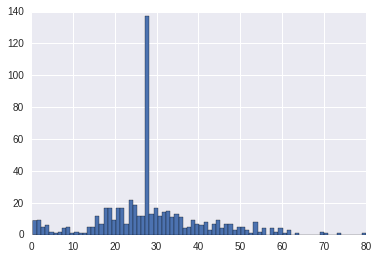

In [16]:
_ = pl.hist(X_train[:,5], bins=80)

# Decision Trees

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

tree_model = DecisionTreeClassifier(criterion='entropy')

tree_model = tree_model.fit(X_train, y_train)
y_preds_train = tree_model.predict(X_train)
y_preds_test = tree_model.predict(X_test)

print "On training set:"
print classification_report(y_train, y_preds_train)
print "On testing set:"
print classification_report(y_test, y_preds_test)

# We can have a look at the generated tree by first exporting it to dot file
export_graphviz(tree_model, out_file='tree.dot')
# Then we can put the generaTted dot file in graphviz
# Or use online tools like http://www.webgraphviz.com/

On training set:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       374
          1       1.00      0.95      0.97       222

avg / total       0.98      0.98      0.98       596

On testing set:
             precision    recall  f1-score   support

          0       0.79      0.79      0.79       175
          1       0.69      0.70      0.70       120

avg / total       0.75      0.75      0.75       295



Looks like we are overfitting (0.98 on training set and 0.75 in testing set)... That is bad!

Let's see if we can avoid that! We need to tune the hyperparameters of the tree.

In [18]:
from sklearn.preprocessing import StandardScaler

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

tree_model = tree_model.fit(X_train, y_train)
y_preds_train = tree_model.predict(X_train)
y_preds_test = tree_model.predict(X_test)

print "On training set:"
print classification_report(y_train, y_preds_train)
print "On testing set:"
print classification_report(y_test, y_preds_test)

On training set:
             precision    recall  f1-score   support

          0       0.84      0.90      0.86       374
          1       0.80      0.70      0.75       222

avg / total       0.82      0.82      0.82       596

On testing set:
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       175
          1       0.83      0.71      0.76       120

avg / total       0.82      0.82      0.82       295



Yeah! It is better now! We achieved lower performances on the training data, but by doing so, we also have a better understanding of the data we never seen before (test data).

This means that this second option is better!

In the general case, it is complicated to tune decision trees so that they don't overfit...

This is why a great algorithm takes care of that for you! Here come the **Random Forest**!

Basically what it does is construct an ensemble of trees (a lot of them). And train each of them on part (generally 66%) of the data. In the end, each single tree overfits a part of the data. But at the end of the training process, each tree casts a vote, and random forest counts the class with maximum votes. The random process therefore "suppresses" the overfitting effect.

# Random Forest

There are a few things to know about random forests:

1. The more trees (estimators), the better! More trees is not equivalent to more overfitting!
2. You don't compute the training error, you use the OOB (out of bag) error, which is equivalent
3. You can parallelize the training since each tree is train individually

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, oob_score=True)
rf_model = rf_model.fit(X_train, y_train)

y_preds_test = rf_model.predict(X_test)

print "On training set:", rf_model.oob_score_
print "On testing set:"
print classification_report(y_test, y_preds_test)

On training set: 0.807046979866
On testing set:
             precision    recall  f1-score   support

          0       0.82      0.85      0.83       175
          1       0.76      0.72      0.74       120

avg / total       0.80      0.80      0.80       295

